Le travail rendu par :
*  Mohamed Amine SOUIDI 181831044438   G2
*  Imad Eddine DJEKOUNE 181831089663   G2

# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',')
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100,)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [ ]:
def Sigmoid(z):
  return 1 / (1 + np.exp(-z))

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

**H(X) :**

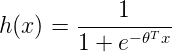


**Cost :**

image.png
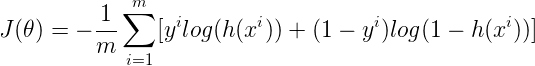



In [ ]:
def computeCost(X, y, theta):
  m = X.shape[0]
  y_prob = Sigmoid(np.matmul(X,theta)) # h(Xi) = Sigmoid ( O0 + X1 * O1 + ... + Xi * Oi ) , shape : (100,1)
  y_n = y.reshape(len(y),1) # shape : (100,) --> (100,1)

  total_cost = -(1 / m) * np.sum(
        y_n * np.log(y_prob) + (1 - y_n) * np.log(1 - y_prob)
      )
  return total_cost

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

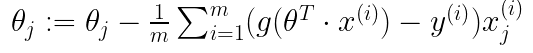

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations):
  m = X.shape[0]
  y_n = y.reshape(len(y),1)
  t = np.copy(theta)

  for i in range(iterations):
    # calcule de la fonction d'hypothese
    y_prob = Sigmoid(np.matmul(X,t)) # h(Xi) = Sigmoid ( O0 + X1 * O1 + ... + Xi * Oi )

    # calcule du gradient
    gradient = np.zeros((X.shape[1],1))
    for j in range(len(gradient)):
      gradient[j] = (1/m)*np.sum(( y_prob - y_n ) * X[:,j].reshape(len(X),1)) # (1/m) * sum ( ( h(Xi) - y ) * Xij ) 
    
    # update les nouveaux theta
    for j in range(len(t)):
      t[j] = t[j] - alpha * gradient[j]

  return t

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [ ]:
initialCost=computeCost(X, y, theta)
initialCost

0.6931471805599453

Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations = 50000
alpha = 0.104
# Appel
theta = gradientDescent(X, y, theta, alpha, iterations)

In [ ]:
print(theta)

[[-25.14778057]
 [  1.03062385]
 [  1.00679592]]


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def drawLine(p,t):
  x_ = np.linspace(6,20,100)
  y_ = (1/t[1])*((-t[2]) *x_ - t[0])
  p.plot(x_, y_, '-r')

# Affichage 
Graphe representant les acceptations selon les caracteristiques

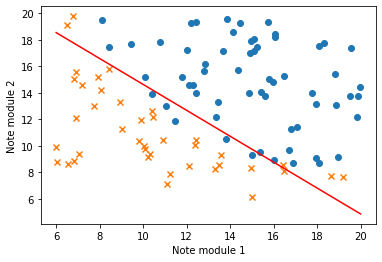

In [ ]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
y_prob = Sigmoid(np.matmul(X,theta))

drawLine(plt,theta)



Traçage du coût en fonction de theta0 et theta1

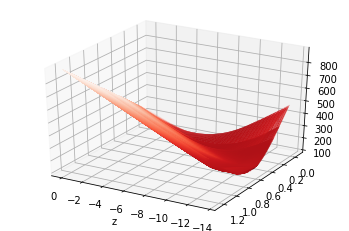

In [ ]:
# defining all 3 axes
nbIter = 2000
x_ = np.zeros((nbIter+1))
y_ = np.zeros((nbIter+1))

theta_ = np.zeros((3, 1))

for i in range(0,nbIter+1):
  x_[i] = (theta_[0])
  y_[i] = (theta_[1])
  theta_ = gradientDescent(X, y, theta_, 0.1, 1)

x_ = x_[1:len(x_)]
y_ = y_[1:len(y_)]

x_ = np.array([x_[i] for i in range(0,nbIter,10)])
y_ = np.array([y_[i] for i in range(0,nbIter,10)])

x_grid = np.zeros((x_.shape[0],x_.shape[0]))
y_grid = np.zeros((y_.shape[0],y_.shape[0]))
z_grid = np.zeros((y_.shape[0],y_.shape[0]))

for i in range(len(x_grid)):
  for j in range(len(x_grid)):
    x_grid[i][j] = x_[i]
    y_grid[j][i] = y_[i]


for i in range(len(x_grid)):
  for j in range(len(x_grid)):
    z_grid[i][j] = computeCost(X, y, [ x_grid[i][j] ,  y_grid[i][j] , theta_[2][0] ])


output = plt.subplot(111, projection = '3d')   # 3d projection
output.view_init(30, 120)
output.plot_surface(x_grid, y_grid, z_grid, rstride = 2, cstride = 2, cmap = plt.cm.Reds_r)
output.set_xlabel('x')                         # axis label
output.set_xlabel('y')
output.set_xlabel('z')
plt.show()

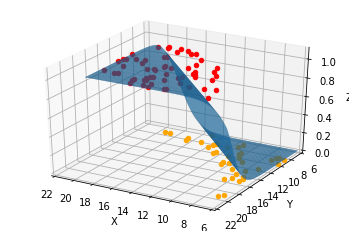

In [ ]:
# affich mc
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x_ = [i/10 for i in range(60,200)]
y_ = [i/10 for i in range(60,200)]
z_ = y



xgrid, ygrid = np.meshgrid(x_, y_)
zgrid = np.zeros(xgrid.shape)

for i in range(len(zgrid)):
  for j in range(len(zgrid[i])):
    zgrid[i][j] = Sigmoid(theta[0] + xgrid[i][j] * theta[1] + ygrid[i][j] * theta[2])

ax.plot_surface(xgrid, ygrid, zgrid, rstride = 2, cstride = 1)


x_ = X[:,1]
y_ = X[:,2]
ax.scatter3D([x_[i] for i in range(len(z_)) if z_[i] > 0.5],
             [y_[i] for i in range(len(z_)) if z_[i] > 0.5], 
             [z_[i] for i in range(len(z_)) if z_[i] > 0.5], c='r', marker='o',depthshade=False)

ax.scatter3D([x_[i] for i in range(len(z_)) if z_[i] < 0.5],
             [y_[i] for i in range(len(z_)) if z_[i] < 0.5], 
             [z_[i] for i in range(len(z_)) if z_[i] < 0.5], c='orange', marker='o',depthshade=False)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim(6,22)
ax.set_ylim(6,22)
ax.set_zlim(0,1.1)
ax.view_init(30,120)
plt.show()


Prédire des valeurs de y

In [ ]:
# Predire pour des notes note1= 9 et note2=17
Sigmoid(np.matmul([[1,9,17]],theta))

array([[0.77614915]])

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy.special import expit

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X[:,1:3], y)

print("sklern result : ")
print("theta 0 : {0}".format(clf.intercept_[0]))
print("theta 1 : {0}".format(clf.coef_[0][0]))
print("theta 2 : {0}".format(clf.coef_[0][1]))
print()
print("mon result : ")
print("theta 0 : {0}".format(theta[0]))
print("theta 1 : {0}".format(theta[1]))
print("theta 2 : {0}".format(theta[2]))

sklern result : 
theta 0 : -25.161882760578557
theta 1 : 1.0311879007651652
theta 2 : 1.0073664101953013

mon result : 
theta 0 : [-25.14778057]
theta 1 : [1.03062385]
theta 2 : [1.00679592]


In [ ]:
print("predictions : ")
print("prediction de sklearn : ",clf.predict_proba([[9,17]]))
print("prediction from scratch : ",Sigmoid(np.matmul([[1,9,17]],theta)))

predictions : 
prediction de sklearn :  [[0.22373401 0.77626599]]
prediction from scratch :  [[0.77614915]]


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [ ]:
# bonne chance